In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def plot_embed(Y, labels, title):
    plt.figure()
    plt.title(title)
    plt.scatter(Y[:, 0], Y[:, 1], 5, labels)

In [25]:
bump = lambda: np.random.randn(50, 20)
shift = lambda d: d*np.random.randn(20)

quadrant = lambda: np.concatenate([bump()+shift(5), bump()+shift(5), bump()+shift(5), bump()+shift(5)])

X = np.concatenate([quadrant()+shift(20), quadrant()+shift(20), quadrant()+shift(20), quadrant()+shift(20)])
labels = np.array(50*[0] + 50*[1] + 50*[2] + 50*[3])
labels = np.concatenate(4*[labels])

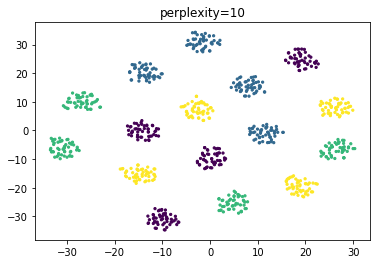

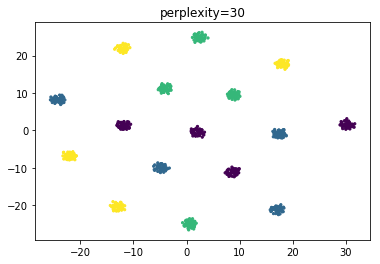

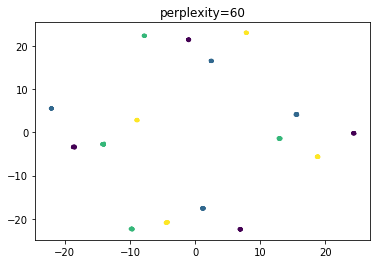

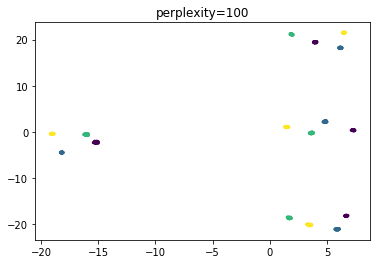

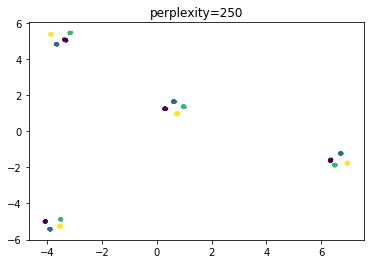

In [22]:
for p in [10.0, 30.0, 60.0, 100.0, 250.0]:
    tsne = TSNE(perplexity=p, n_iter=400)
    Y = tsne.fit_transform(X)
    plot_embed(Y)
plt.show()

In [229]:
from trimap import Wrapper as TriMap

X = np.loadtxt('data/mnist2500_X.txt')
labels_base = np.loadtxt('data/mnist2500_labels.txt')
labels = np.concatenate([labels_base, labels_base])
plt.rcParams['image.cmap'] = 'tab10'

## Base behavior (MNIST2500)

In [225]:
trimap = TriMap(X)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=1000, verbose=True)
Y_tsne = TSNE(n_iter=1000, verbose=True).fit_transform(X)

Generated triplets 500 / 2500
Generated triplets 1000 / 2500
Generated triplets 1500 / 2500
Generated triplets 2000 / 2500
Generated triplets 2500 / 2500
Generated random triplets 500 / 2500
Generated random triplets 1000 / 2500
Generated random triplets 1500 / 2500
Generated random triplets 2000 / 2500
Generated random triplets 2500 / 2500
Iteration:  100, Loss: 33.077, Violated triplets: 0.1001
Iteration:  200, Loss: 21.041, Violated triplets: 0.0764
Iteration:  300, Loss: 17.554, Violated triplets: 0.0748
Iteration:  400, Loss: 15.677, Violated triplets: 0.0728
Iteration:  500, Loss: 14.829, Violated triplets: 0.0724
Iteration:  600, Loss: 14.312, Violated triplets: 0.0720
Iteration:  700, Loss: 13.911, Violated triplets: 0.0712
Iteration:  800, Loss: 13.641, Violated triplets: 0.0709
Iteration:  900, Loss: 13.430, Violated triplets: 0.0705
Iteration: 1000, Loss: 13.260, Violated triplets: 0.0701
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.071s...
[t-

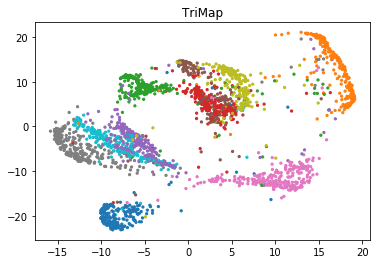

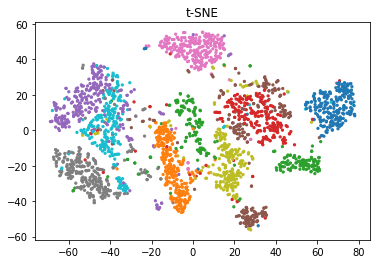

In [231]:
plot_embed(Y_trimap, labels_base, 'TriMap')
plot_embed(Y_tsne, labels_base, 't-SNE')
plt.show()

## Shift by uniform ~ [0, 1]^n

In [232]:
shift = np.random.uniform(size=784)
X_shift = np.concatenate([X, X+shift])

In [233]:
trimap = TriMap(X_shift)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=500, optimizer='sgd-momentum', verbose=True)
Y_tsne = TSNE(n_iter=500, verbose=True).fit_transform(X_shift)

Generated triplets 500 / 5000
Generated triplets 1000 / 5000
Generated triplets 1500 / 5000
Generated triplets 2000 / 5000
Generated triplets 2500 / 5000
Generated triplets 3000 / 5000
Generated triplets 3500 / 5000
Generated triplets 4000 / 5000
Generated triplets 4500 / 5000
Generated triplets 5000 / 5000
Generated random triplets 500 / 5000
Generated random triplets 1000 / 5000
Generated random triplets 1500 / 5000
Generated random triplets 2000 / 5000
Generated random triplets 2500 / 5000
Generated random triplets 3000 / 5000
Generated random triplets 3500 / 5000
Generated random triplets 4000 / 5000
Generated random triplets 4500 / 5000
Generated random triplets 5000 / 5000
Iteration:  100, Loss: 25.544, Violated triplets: 0.0380
Iteration:  200, Loss: 20.213, Violated triplets: 0.0329
Iteration:  300, Loss: 17.368, Violated triplets: 0.0309
Iteration:  400, Loss: 15.589, Violated triplets: 0.0303
Iteration:  500, Loss: 14.236, Violated triplets: 0.0295
[t-SNE] Computing 91 neares

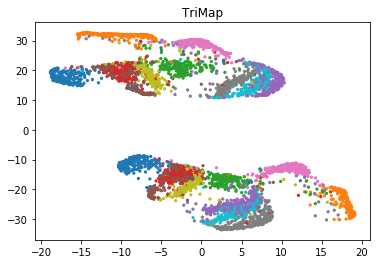

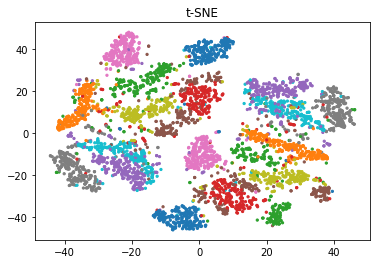

In [234]:
plot_embed(Y_trimap, labels_shift, 'TriMap')
plot_embed(Y_tsne, labels_shift, 't-SNE')
plt.show()

## Permute Features

In [235]:
# randomly permute columns
X_cols = X.copy().T
np.random.shuffle(X_cols)
X_permute = np.concatenate([X, X_cols.T])

In [236]:
trimap = TriMap(X_permute)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=500, optimizer='sgd-momentum', verbose=True)
Y_tsne = TSNE(n_iter=500, verbose=True).fit_transform(X_permute)

Generated triplets 500 / 5000
Generated triplets 1000 / 5000
Generated triplets 1500 / 5000
Generated triplets 2000 / 5000
Generated triplets 2500 / 5000
Generated triplets 3000 / 5000
Generated triplets 3500 / 5000
Generated triplets 4000 / 5000
Generated triplets 4500 / 5000
Generated triplets 5000 / 5000
Generated random triplets 500 / 5000
Generated random triplets 1000 / 5000
Generated random triplets 1500 / 5000
Generated random triplets 2000 / 5000
Generated random triplets 2500 / 5000
Generated random triplets 3000 / 5000
Generated random triplets 3500 / 5000
Generated random triplets 4000 / 5000
Generated random triplets 4500 / 5000
Generated random triplets 5000 / 5000
Iteration:  100, Loss: 27.525, Violated triplets: 0.0450
Iteration:  200, Loss: 20.167, Violated triplets: 0.0356
Iteration:  300, Loss: 17.648, Violated triplets: 0.0339
Iteration:  400, Loss: 16.067, Violated triplets: 0.0335
Iteration:  500, Loss: 14.789, Violated triplets: 0.0329
[t-SNE] Computing 91 neares

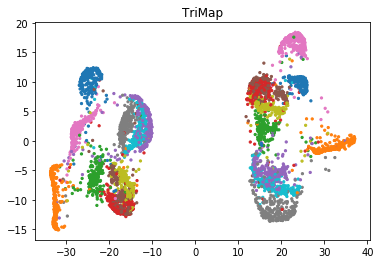

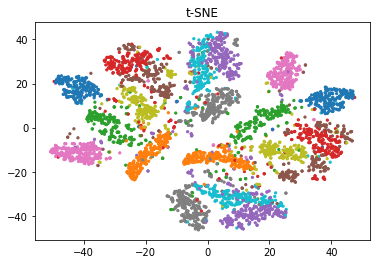

In [237]:
plot_embed(Y_trimap, labels, 'TriMap')
plot_embed(Y_tsne, labels, 't-SNE')
plt.show()

## Add mean of a class

In [238]:
four_center = X[labels[:2500] == 4].mean()
X_fourier = np.concatenate([X, X+four_center])

In [239]:
trimap = TriMap(X_fourier)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=500, verbose=True)
Y_tsne = TSNE(n_iter=500, verbose=True).fit_transform(X_fourier)

Generated triplets 500 / 5000
Generated triplets 1000 / 5000
Generated triplets 1500 / 5000
Generated triplets 2000 / 5000
Generated triplets 2500 / 5000
Generated triplets 3000 / 5000
Generated triplets 3500 / 5000
Generated triplets 4000 / 5000
Generated triplets 4500 / 5000
Generated triplets 5000 / 5000
Generated random triplets 500 / 5000
Generated random triplets 1000 / 5000
Generated random triplets 1500 / 5000
Generated random triplets 2000 / 5000
Generated random triplets 2500 / 5000
Generated random triplets 3000 / 5000
Generated random triplets 3500 / 5000
Generated random triplets 4000 / 5000
Generated random triplets 4500 / 5000
Generated random triplets 5000 / 5000
Iteration:  100, Loss: 99.344, Violated triplets: 0.0573
Iteration:  200, Loss: 70.522, Violated triplets: 0.0452
Iteration:  300, Loss: 57.911, Violated triplets: 0.0426
Iteration:  400, Loss: 50.271, Violated triplets: 0.0408
Iteration:  500, Loss: 45.306, Violated triplets: 0.0400
[t-SNE] Computing 91 neares

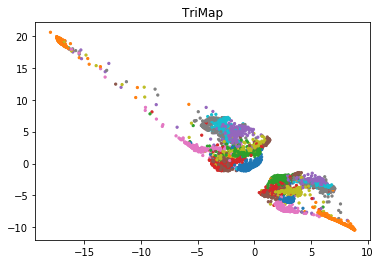

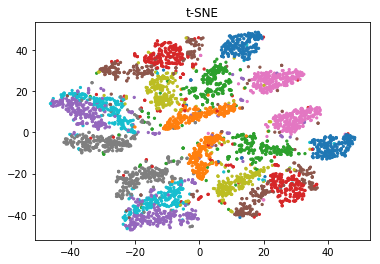

In [240]:
plot_embed(Y_trimap, labels, 'TriMap')
plot_embed(Y_tsne, labels, 't-SNE')
plt.show()

## Add 28 to first dim

In [241]:
X_shift1d = X.copy()
X_shift1d[:, 0] += 28
X_shift1d = np.concatenate([X, X_shift1d])

In [247]:
trimap = TriMap(X_shift1d)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=500, verbose=True)
Y_tsne = TSNE(n_iter=500, verbose=True).fit_transform(X_shift1d)

Generated triplets 500 / 5000
Generated triplets 1000 / 5000
Generated triplets 1500 / 5000
Generated triplets 2000 / 5000
Generated triplets 2500 / 5000
Generated triplets 3000 / 5000
Generated triplets 3500 / 5000
Generated triplets 4000 / 5000
Generated triplets 4500 / 5000
Generated triplets 5000 / 5000
Generated random triplets 500 / 5000
Generated random triplets 1000 / 5000
Generated random triplets 1500 / 5000
Generated random triplets 2000 / 5000
Generated random triplets 2500 / 5000
Generated random triplets 3000 / 5000
Generated random triplets 3500 / 5000
Generated random triplets 4000 / 5000
Generated random triplets 4500 / 5000
Generated random triplets 5000 / 5000
Iteration:  100, Loss: 274.148, Violated triplets: 0.0609
Iteration:  200, Loss: 137.331, Violated triplets: 0.0508
Iteration:  300, Loss: 116.231, Violated triplets: 0.0460
Iteration:  400, Loss: 101.880, Violated triplets: 0.0434
Iteration:  500, Loss: 90.916, Violated triplets: 0.0414
[t-SNE] Computing 91 ne

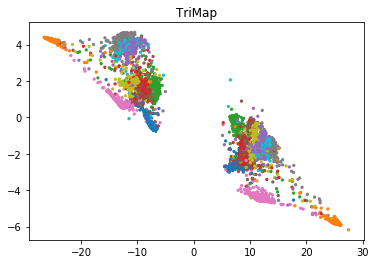

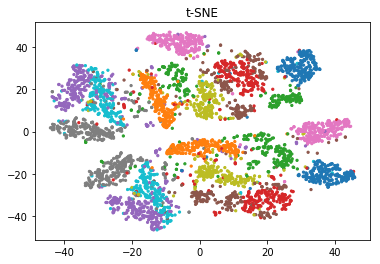

In [248]:
plot_embed(Y_trimap, labels, 'TriMap')
plot_embed(Y_tsne, labels, 't-SNE')
plt.show()

## Invert Features

In [249]:
X_inverted = 1 - X.copy()
X_inverted = np.concatenate([X, X_inverted])

In [250]:
trimap = TriMap(X_inverted)
trimap.generate_triplets(verbose=True)
Y_trimap = trimap.embed(num_iters=500, verbose=True)
Y_tsne = TSNE(n_iter=500, verbose=True).fit_transform(X_inverted)

Generated triplets 500 / 5000
Generated triplets 1000 / 5000
Generated triplets 1500 / 5000
Generated triplets 2000 / 5000
Generated triplets 2500 / 5000
Generated triplets 3000 / 5000
Generated triplets 3500 / 5000
Generated triplets 4000 / 5000
Generated triplets 4500 / 5000
Generated triplets 5000 / 5000
Generated random triplets 500 / 5000
Generated random triplets 1000 / 5000
Generated random triplets 1500 / 5000
Generated random triplets 2000 / 5000
Generated random triplets 2500 / 5000
Generated random triplets 3000 / 5000
Generated random triplets 3500 / 5000
Generated random triplets 4000 / 5000
Generated random triplets 4500 / 5000
Generated random triplets 5000 / 5000
Iteration:  100, Loss: 83.420, Violated triplets: 0.0585
Iteration:  200, Loss: 60.379, Violated triplets: 0.0446
Iteration:  300, Loss: 49.901, Violated triplets: 0.0402
Iteration:  400, Loss: 43.955, Violated triplets: 0.0382
Iteration:  500, Loss: 40.032, Violated triplets: 0.0370
[t-SNE] Computing 91 neares

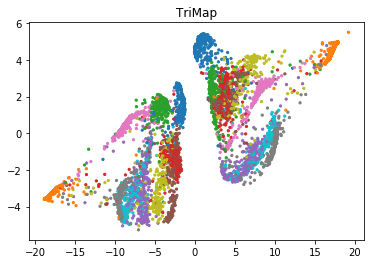

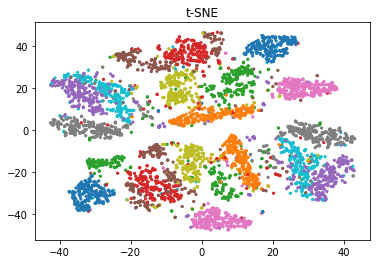

In [251]:
plot_embed(Y_trimap, labels, 'TriMap')
plot_embed(Y_tsne, labels, 't-SNE')
plt.show()